# Import Required library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

# Data load and Preprocess

In [3]:
df = pd.read_csv('/kaggle/input/modifedckd/ckd-dataset-v2(edited).csv')
df.drop(index=[0,1], axis=0, inplace=True)
df.drop(['stage','affected'], axis=1, inplace=True)
df['class'] = df['class'].map({'ckd':1,'notckd':0})

df.head()


,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,age
2,0,0,1.019 - 1.021,1,1,0,< 0,0,0,0,...,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,≥ 227.944,< 12
3,0,0,1.009 - 1.011,< 0,1,0,< 0,0,0,0,...,4.46 - 5.05,12120 - 14500,0,0,0,0,0,0,≥ 227.944,< 12
4,0,0,1.009 - 1.011,≥ 4,1,1,< 0,1,0,1,...,4.46 - 5.05,14500 - 16880,0,0,0,1,0,0,127.281 - 152.446,< 12
5,1,1,1.009 - 1.011,3,1,0,< 0,0,0,0,...,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,127.281 - 152.446,< 12
6,0,0,1.015 - 1.017,< 0,1,0,< 0,0,0,0,...,5.05 - 5.64,7360 - 9740,0,1,0,1,1,0,127.281 - 152.446,12-20


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 2 to 201
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   bp (Diastolic)  200 non-null    object
 1   bp limit        200 non-null    object
 2   sg              200 non-null    object
 3   al              198 non-null    object
 4   class           200 non-null    int64 
 5   rbc             200 non-null    object
 6   su              200 non-null    object
 7   pc              200 non-null    object
 8   pcc             200 non-null    object
 9   ba              200 non-null    object
 10  bgr             200 non-null    object
 11  bu              200 non-null    object
 12  sod             200 non-null    object
 13  sc              200 non-null    object
 14  pot             200 non-null    object
 15  hemo            200 non-null    object
 16  pcv             200 non-null    object
 17  rbcc            200 non-null    object
 18  wbcc      

Name of columns

In [5]:
df.columns

Index(['bp (Diastolic)', 'bp limit', 'sg', 'al', 'class', 'rbc', 'su', 'pc',
       'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
       'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'age'],
      dtype='object')

# Define function for preprocess
    

In [6]:
import pandas as pd

cols=df.columns

def preprocess_range(range_value):
    if isinstance(range_value, str):
        range_value = range_value.strip()  # Remove leading/trailing spaces
        if range_value.replace('.', '', 1).isdigit():  # Check if it is a valid numeric value
            return float(range_value)
        elif '-' in range_value:
            lower, upper = map(float, range_value.split('-'))
            return (lower + upper) / 2
        elif '≥' in range_value:
            return float(range_value[2:])
        elif '<' in range_value:
            return float(range_value[1:])
    elif isinstance(range_value, (int, float)):
        return range_value
    return range_value


# Calculate the average and replace the range values in the same column
for x in cols:
    df[x]=df[x].apply(preprocess_range)

# Statistically data representation



In [7]:
df.describe()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,age
count,200.000000,200.000000,200.000000,198.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,...,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.540000,0.755000,1.017450,0.979798,0.640000,0.125000,0.397500,0.22500,0.135000,0.055000,...,4.732875,8746.35000,0.390000,0.350000,0.110000,0.200000,0.175000,0.160000,70.088293,53.205000
std,0.499648,0.805119,0.004835,1.344134,0.481205,0.331549,1.033725,0.41863,0.342581,0.228552,...,0.849932,2794.68954,0.488974,0.478167,0.313675,0.401004,0.380921,0.367526,53.384215,15.825381
min,0.000000,0.000000,1.007000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,2.690000,4980.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,12.000000
25%,0.000000,0.000000,1.016000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,4.165000,6170.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.617500,47.000000
50%,1.000000,1.000000,1.020000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,4.755000,8550.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.200350,55.000000
75%,1.000000,1.000000,1.020000,2.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,5.345000,8550.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,89.532000,62.500000
max,1.000000,2.000000,1.023000,4.000000,1.000000,1.000000,4.000000,1.00000,1.000000,1.000000,...,7.410000,24020.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,227.944000,74.000000


# Now, let’s see the total count of null values that every feature holds

 

In [8]:
df.isna().sum()

bp (Diastolic)    0
bp limit          0
sg                0
al                2
class             0
rbc               0
su                0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sod               0
sc                0
pot               0
hemo              0
pcv               0
rbcc              0
wbcc              0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
grf               0
age               0
dtype: int64

Non Null value

# Corelation Matrix and Matrix Visualization

In [9]:
df.corr()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,age
bp (Diastolic),1.000000,0.867676,0.025795,0.076596,0.101994,0.197173,0.063921,0.088890,-0.075742,0.090649,...,-0.055503,-0.084879,0.079805,0.004207,0.003848,0.110354,-0.023762,0.129163,-0.130766,0.012939
bp limit,0.867676,1.000000,-0.076103,0.169030,0.277050,0.322381,0.132697,0.238921,0.047643,0.210141,...,-0.211596,-0.013062,0.180106,0.106381,0.007760,0.214792,0.042192,0.285984,-0.242394,0.056614
sg,0.025795,-0.076103,1.000000,-0.443525,-0.623367,-0.213960,-0.283318,-0.281180,-0.288684,-0.218062,...,0.424160,-0.260170,-0.306306,-0.314098,-0.128898,-0.165886,-0.214879,-0.111426,0.357419,-0.149875
al,0.076596,0.169030,-0.443525,1.000000,0.552426,0.340311,0.356874,0.592641,0.445061,0.381895,...,-0.412877,0.303357,0.461153,0.344079,0.221083,0.284741,0.289758,0.276012,-0.391889,0.110541
class,0.101994,0.277050,-0.623367,0.552426,1.000000,0.283473,0.289123,0.404112,0.296292,0.180937,...,-0.606751,0.239584,0.599693,0.550350,0.263671,0.375000,0.345425,0.327327,-0.633218,0.246306
rbc,0.197173,0.322381,-0.213960,0.340311,0.283473,1.000000,0.066896,0.375627,0.027651,0.174078,...,-0.247907,0.018555,0.255722,0.134713,0.108718,0.188982,0.223814,0.206197,-0.233527,-0.004908
su,0.063921,0.132697,-0.283318,0.356874,0.289123,0.066896,1.000000,0.158070,0.166979,0.140963,...,-0.158665,0.134302,0.238549,0.418597,0.290656,0.007274,0.096829,0.036770,-0.223034,0.197577
pc,0.088890,0.238921,-0.281180,0.592641,0.404112,0.375627,0.158070,1.000000,0.522959,0.342698,...,-0.423404,0.151166,0.330182,0.232209,0.116718,0.389145,0.350576,0.385399,-0.346491,0.089334
pcc,-0.075742,0.047643,-0.288684,0.445061,0.296292,0.027651,0.166979,0.522959,1.000000,0.225592,...,-0.290072,0.190782,0.224088,0.200930,0.188455,0.204844,0.087605,0.266607,-0.274098,0.165881
ba,0.090649,0.210141,-0.218062,0.381895,0.180937,0.174078,0.140963,0.342698,0.225592,1.000000,...,-0.161593,0.170250,0.076890,0.052879,0.125468,0.153522,0.062049,0.074181,-0.114024,-0.005217


# How much Value each class contain and Visualize

In [10]:
df['class'].value_counts()


1    128
0     72
Name: class, dtype: int64

In [11]:
countNoDisease = len(df[df['class'] == 0])
countHaveDisease = len(df[df['class'] == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df['class']))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df['class']))*100)))

Percentage of Patients Haven't Heart Disease: 36.00%
Percentage of Patients Have Heart Disease: 64.00%


# Check the data balancing by plot

<Axes: title={'center': 'Count of Diagnosis of kidney disease'}>

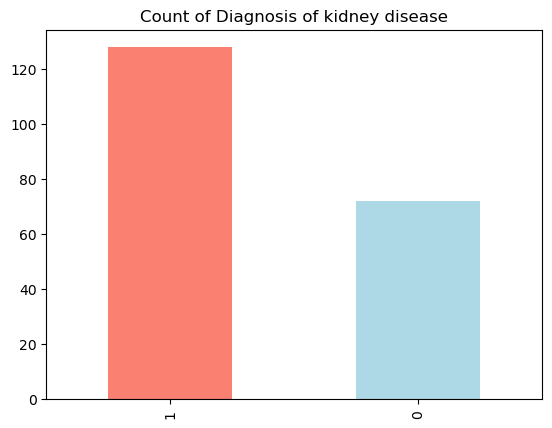

In [12]:
df['class'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of Diagnosis of kidney disease")


# Here we will be checking the distribution of the age column

 

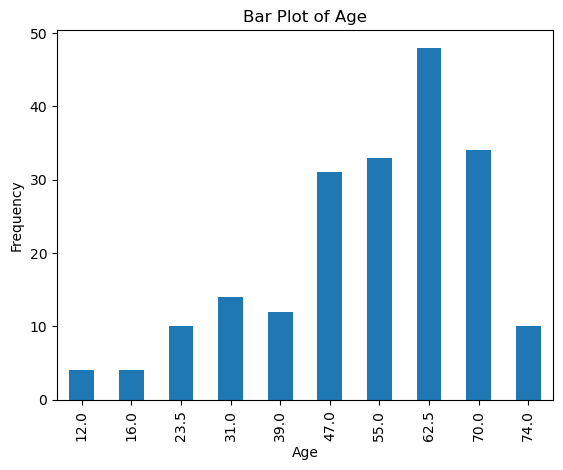

In [13]:
import matplotlib.pyplot as plt

df['age'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Bar Plot of Age')
plt.show()



# Finding the Correlation between the plots



<Axes: >

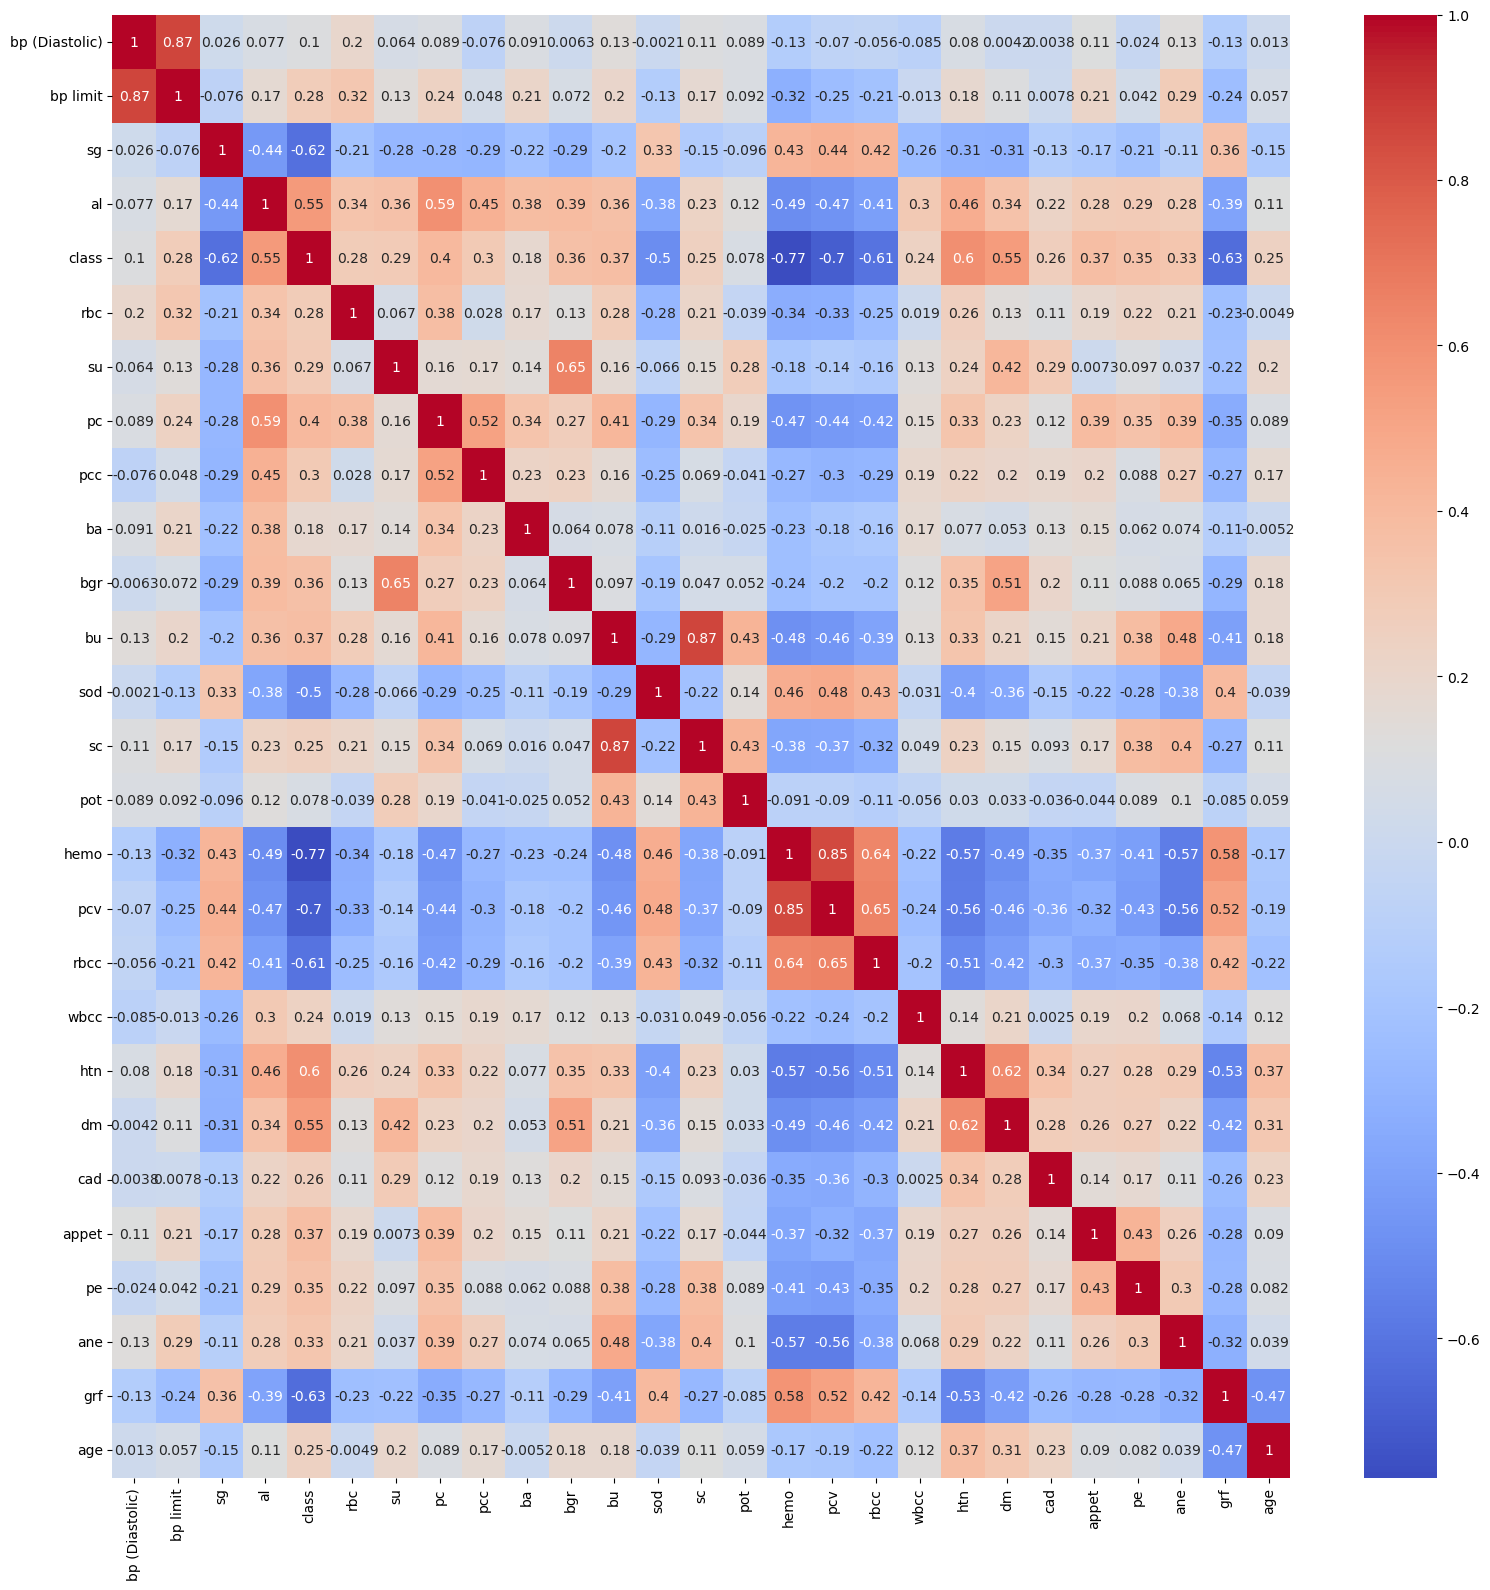

In [14]:
plt.figure(figsize = (19,19))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm') # looking for strong correlations with "class" row

Now dropping the null values.


In [15]:
df.shape[0], df.dropna().shape[0]
df.dropna(inplace=True)
df.shape

(198, 27)

# Split the dataset

In [16]:
X = df.loc[:, df.columns != 'class']
y=df['class']
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify = y, shuffle = True)


# Data Standardlization and normalization
  Standardlization for numerical columns and OneHotEncoder for Categorical Columns

In [17]:
from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [18]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [19]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

# Define differents Model Pipeline and Evaluate

# Model1

Preprocessor and Logisticregression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

model1 = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
model1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['bp (Diastolic)', 'bp limit',
                                                   'sg', 'al', 'rbc', 'su',
                                                   'pc', 'pcc', 'ba', 'bgr',
                                                   'bu', 'sod', 'sc', 'pot',
                                                   'hemo', 'pcv', 'rbcc',
                                                   'wbcc', 'htn', 'dm', 'cad',
                                                   'appet', 'pe', 'ane', 'grf',
                                                   'age'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [27]:
model1.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['bp (Diastolic)', 'bp limit',
                                                   'sg', 'al', 'rbc', 'su',
                                                   'pc', 'pcc', 'ba', 'bgr',
                                                   'bu', 'sod', 'sc', 'pot',
                                                   'hemo', 'pcv', 'rbcc',
                                                   'wbcc', 'htn', 'dm', 'cad',
                                                   'appet', 'pe', 'ane', 'grf',
                                                   'age'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

In [28]:
model1.score(X_train,y_train)

1.0

In [29]:
model1.score(X_test,y_test)


0.96

In [24]:
y=model1.predict(X)


# Observe Risk factor for Chronic Kidney Diseases

In [73]:
coefficients1 = model1[1].coef_

pd.DataFrame(coefficients1, columns=X.columns)


,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,...,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,age
0,0.068102,0.539666,-1.169643,0.575639,0.090976,0.188611,0.100535,0.065291,0.019598,0.356423,...,-0.68297,0.257643,0.65407,0.527229,0.02264,0.415692,0.379323,0.053671,-0.745936,-0.100512


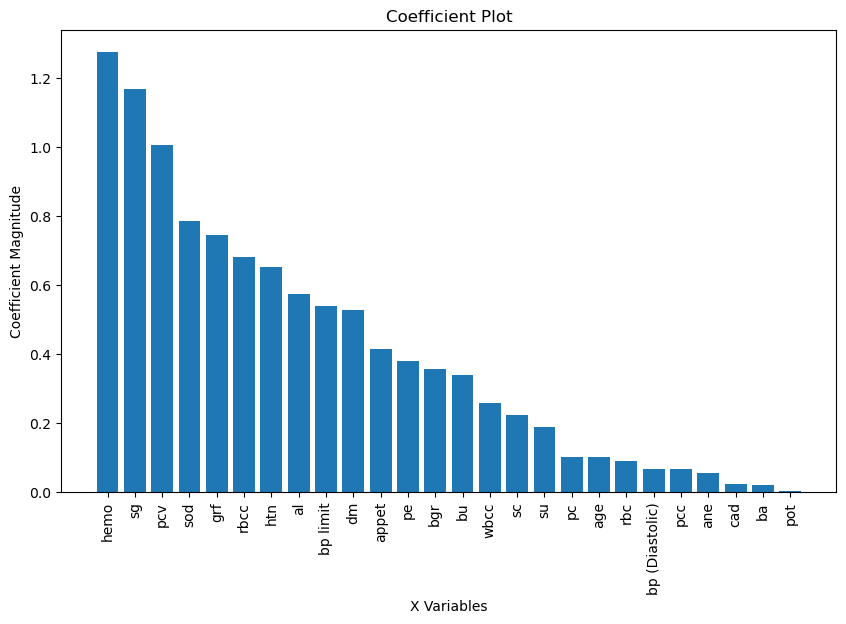

In [74]:
import matplotlib.pyplot as plt
import pandas as pd


coefficient_series = pd.Series(coefficients1[0], index=X.columns)

plt.figure(figsize=(10, 6))  

coefficient_abs = coefficient_series.abs().sort_values(ascending=False)

plt.bar(coefficient_abs.index, coefficient_abs)

plt.xticks(rotation=90)  

plt.xlabel('X Variables')
plt.ylabel('Coefficient Magnitude')
plt.title('Coefficient Plot')

plt.show()


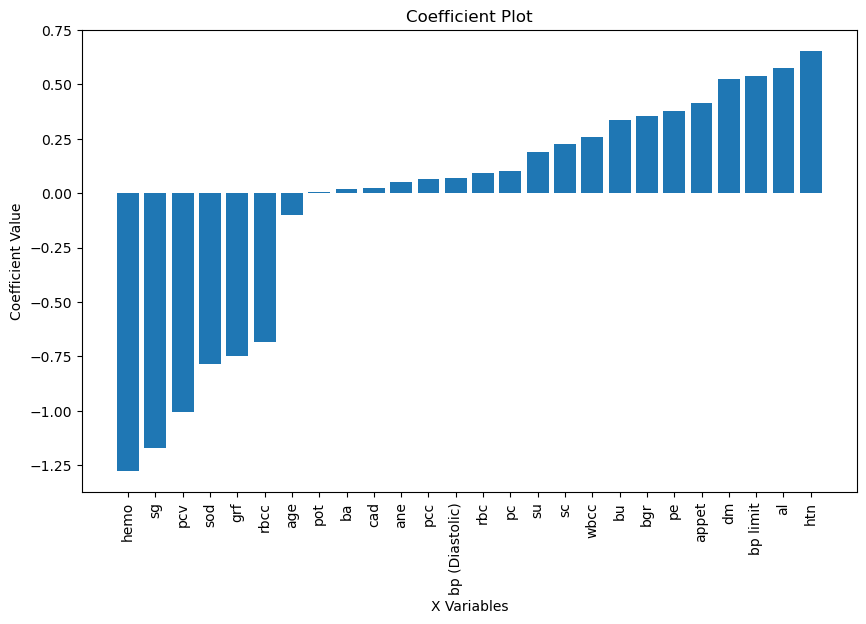

In [76]:
import matplotlib.pyplot as plt
import pandas as pd


coefficient_series = pd.Series(coefficients1[0], index=X.columns)


plt.figure(figsize=(10, 6))  
coefficient_sorted = coefficient_series.sort_values()

plt.bar(coefficient_sorted.index, coefficient_sorted)

plt.xticks(rotation=90)  
plt.xlabel('X Variables')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Plot')

plt.show()


# Model2



In [ ]:
Using only LogisticRegression

In [47]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()


logreg.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
logreg.score(X_train,y_train)


0.9391891891891891

In [50]:

logreg.score(X_test,y_test)
coefficient=logreg.coef_

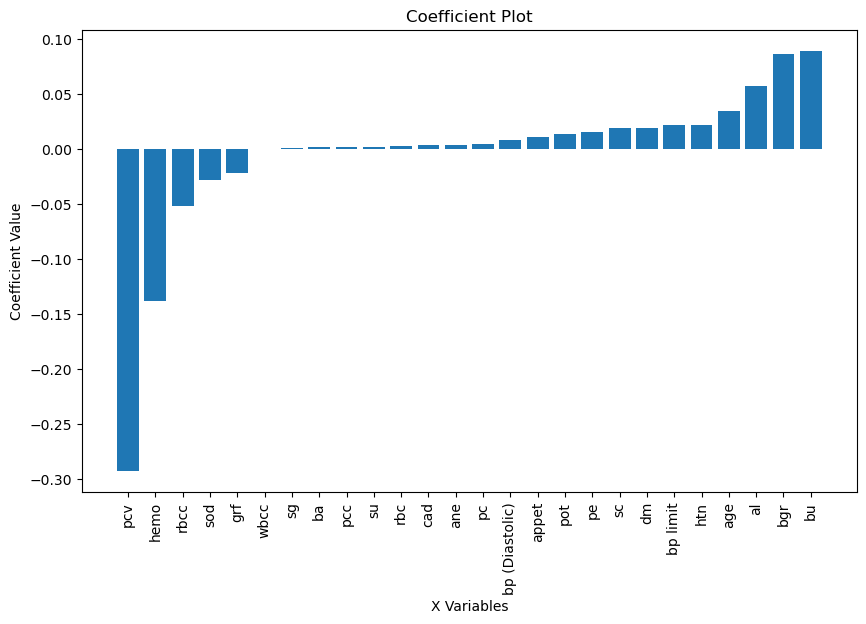

In [51]:
import matplotlib.pyplot as plt
import pandas as pd


coefficient_series = pd.Series(coefficient[0], index=X.columns)

plt.figure(figsize=(10, 6))  
coefficient_sorted = coefficient_series.sort_values()

plt.bar(coefficient_sorted.index, coefficient_sorted)

plt.xticks(rotation=90)  
plt.xlabel('X Variables')
plt.ylabel('Coefficient Value')
plt.title('Coefficient Plot')

plt.show()


# Model3

Using LinearRegression

Train_score: 0.8171260183906843
Test_score 0.696463173181529


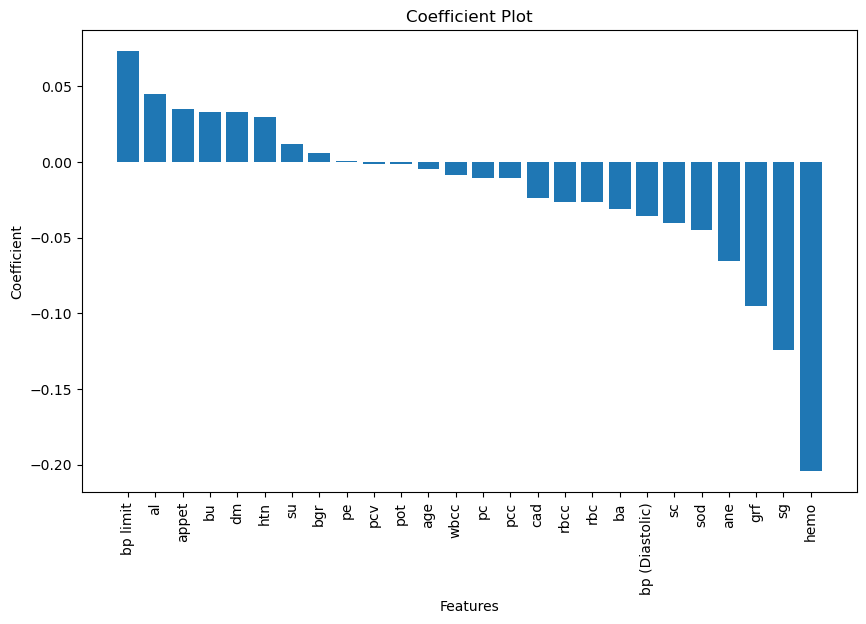

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# As
regression_model = make_pipeline(preprocessor, LinearRegression())

regression_model.fit(X, y)

regression_model.score(X_train,y_train)
print('Train_score:',regression_model.score(X_train,y_train))


print('Test_score',regression_model.score(X_test,y_test))


coefficients = regression_model[1].coef_

coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))  
plt.bar(coefficients_df['Feature'], coefficients_df['Coefficient'])
plt.xticks(rotation=90)  
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Coefficient Plot')
plt.show()


# Model4

Using DecisionTreeClassification

Train_score: 1.0
Test_score 0.96


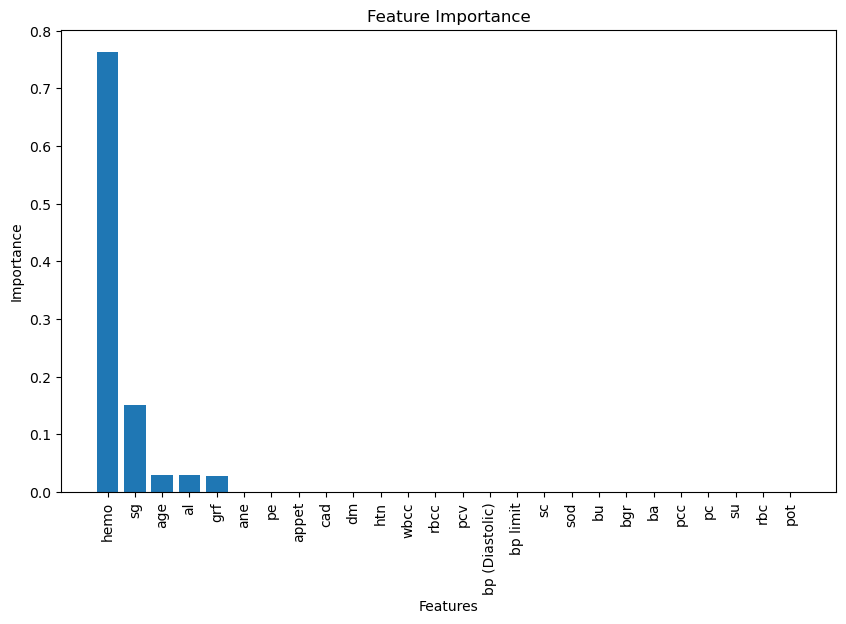

In [84]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier


tree_model = DecisionTreeClassifier()

tree_model.fit(X_train, y_train)


print('Train_score:',tree_model.score(X_train,y_train))


print('Test_score',tree_model.score(X_test,y_test))




feature_importances = tree_model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6)) 
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xticks(rotation=90)  
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


Train_score: 1.0
Test_score 0.94


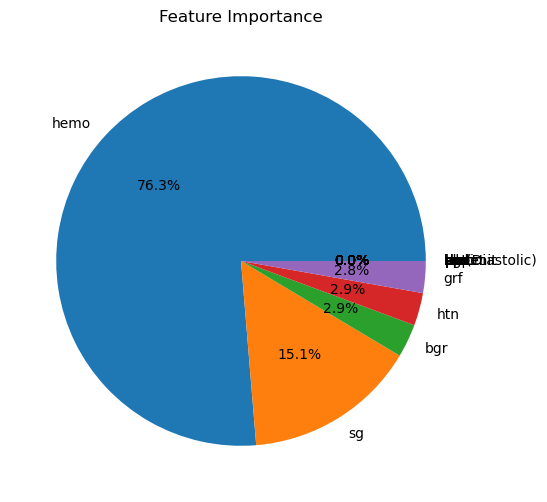

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

print('Train_score:', tree_model.score(X_train, y_train))
print('Test_score', tree_model.score(X_test, y_test))

feature_importances = tree_model.feature_importances_

importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
plt.pie(importance_df['Importance'], labels=importance_df['Feature'], autopct='%1.1f%%')
plt.title('Feature Importance')
plt.show()
